<a href="https://colab.research.google.com/github/AlHasSaN0ALi/Project-Phase-3---DSAI-305/blob/main/Model_RF_Alhassan_DASI_305_Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# **Load Data**

In [ ]:
df = pd.read_csv("cl_data.csv")
df

,concave points_mean,concave points_worst,perimeter_worst,radius_worst,area_worst,concavity_mean,perimeter_mean,radius_mean,area_mean,concavity_worst,...,radius_se,texture_worst,concave points_se,texture_mean,smoothness_worst,symmetry_worst,radius_ratio,area_ratio,concavity_product,diagnosis
0,0.03323,0.09975,123.80,19.19,1150.0,0.032990,102.70,16.020,797.8,0.14590,...,0.3795,33.88,0.007591,23.24,0.11810,0.2948,1.197878,1.441464,0.001096,1
1,0.04781,0.12880,99.70,15.11,711.2,0.066640,87.46,13.540,566.3,0.23900,...,0.2699,19.26,0.013150,14.36,0.14400,0.2977,1.115953,1.255871,0.003186,0
2,0.03110,0.07283,96.09,14.50,630.5,0.045680,85.63,13.080,520.0,0.18900,...,0.1852,20.49,0.006490,15.71,0.13120,0.3184,1.108563,1.212500,0.001421,0
3,0.02076,0.06227,65.13,10.23,314.9,0.029560,60.34,9.504,273.9,0.08867,...,0.2773,15.66,0.014210,12.44,0.13240,0.2450,1.076389,1.149690,0.000614,0
4,0.02923,0.05013,84.46,13.30,545.9,0.025620,82.61,13.030,523.8,0.04833,...,0.1839,22.81,0.011640,18.42,0.09701,0.1987,1.020721,1.042192,0.000749,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0.02738,0.09127,69.57,10.84,357.6,0.059990,65.67,10.290,321.4,0.20000,...,0.2199,34.91,0.017210,27.61,0.13840,0.2226,1.053450,1.112632,0.001643,0
304,0.01116,0.02232,67.88,10.65,347.3,0.005025,64.73,10.160,311.7,0.01005,...,0.2441,22.88,0.007082,19.59,0.12650,0.2262,1.048228,1.114212,0.000056,0
305,0.00000,0.00000,66.50,10.49,330.6,0.000000,59.26,9.423,271.3,0.00000,...,0.5375,34.24,0.000000,27.88,0.10730,0.2475,1.113233,1.218577,0.000000,0
306,0.03736,0.11050,105.90,15.48,733.5,0.102900,96.39,14.590,657.1,0.36620,...,0.2254,27.27,0.016060,22.68,0.10260,0.2258,1.061001,1.116268,0.003844,0


# **Split Data and pre-training process**

In [ ]:
data = pd.read_csv("cl_data.csv")
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# **Random Forest (Before Outlier Removal)**

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
print("Random Forest (Before Outlier Removal):")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest (Before Outlier Removal):
[[75  0]
 [ 1  1]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      0.50      0.67         2

    accuracy                           0.99        77
   macro avg       0.99      0.75      0.83        77
weighted avg       0.99      0.99      0.98        77



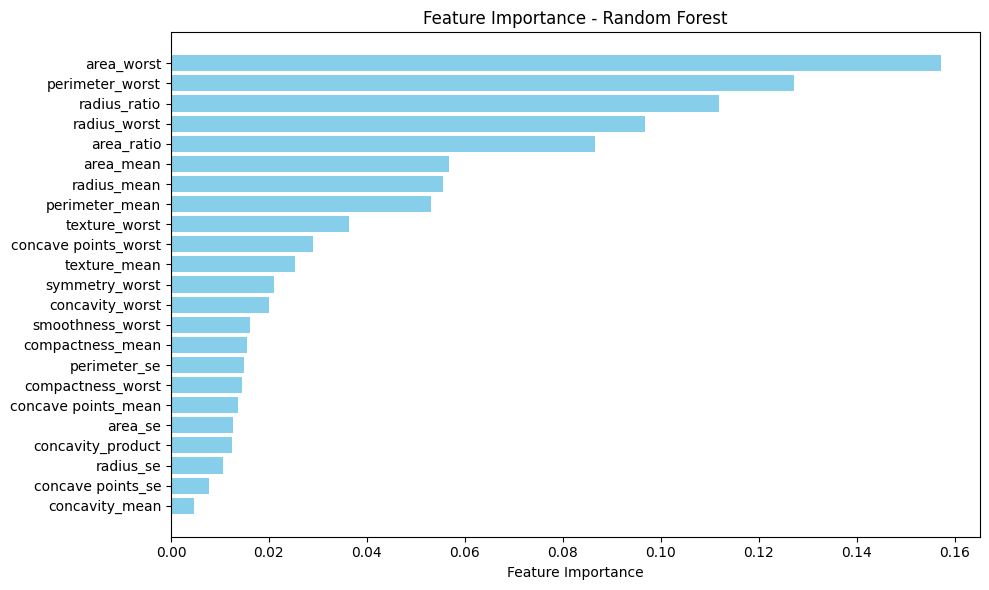

In [ ]:
importance = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({"Feature": features, "Importance": importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
importances = rf_model.feature_importances_
feature_names = X.columns
top10_indices = importances.argsort()[::-1][:10]
top10_features = [feature_names[i] for i in top10_indices]

# **PDP**

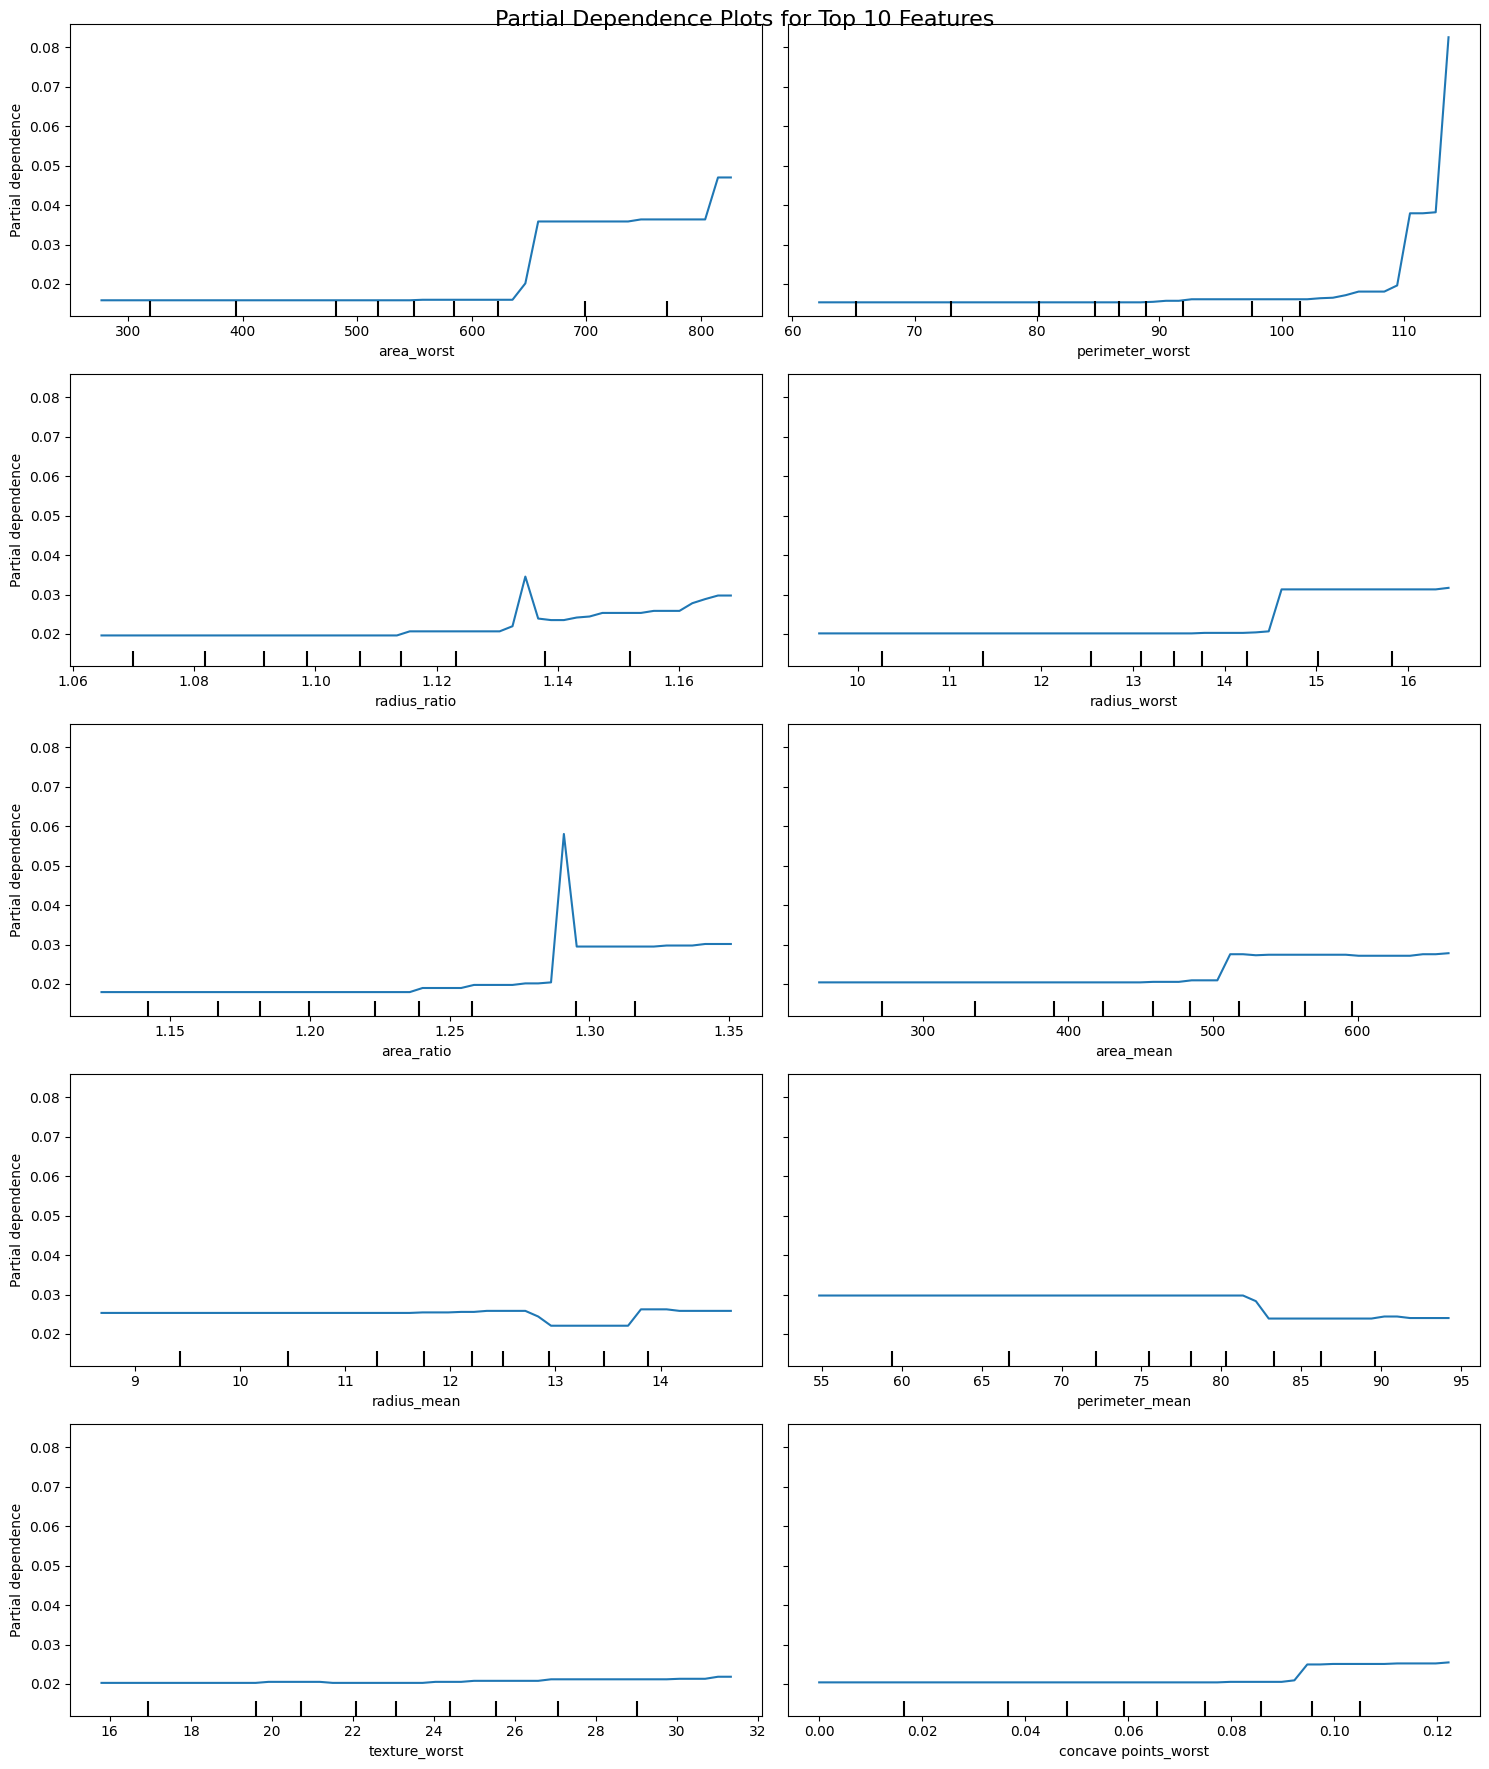

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))
disp = PartialDependenceDisplay.from_estimator(
    rf_model,
    X_test,
    features=top10_features,
    feature_names=feature_names,
    grid_resolution=50,
    ax=ax
)
plt.suptitle("Partial Dependence Plots for Top 10 Features", fontsize=16)
plt.tight_layout()
plt.show()

# **ALE**

In [ ]:
!pip install alibi

In [ ]:
from alibi.explainers import ALE

In [ ]:
!pip install ray[tune]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
!pip install "alibi[ray]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 MB 14.2 MB/s eta 0:00:00


In [ ]:
predict_fn = lambda x: rf_model.predict_proba(x)[:, 1]

In [ ]:
importances = rf_model.feature_importances_
top5_idx = np.argsort(importances)[::-1][:5]
top5_features = [X.columns[i] for i in top5_idx]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


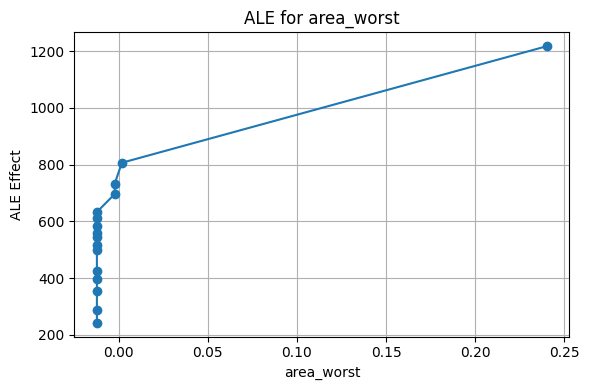

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


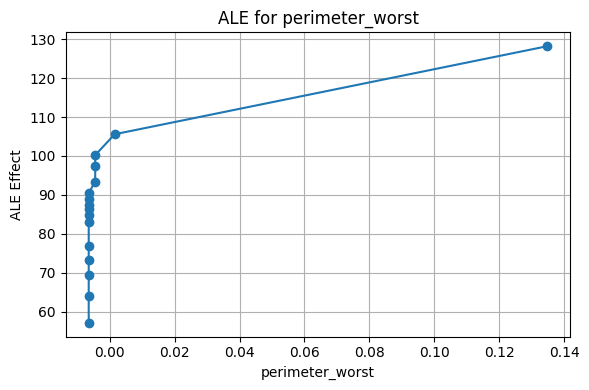

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


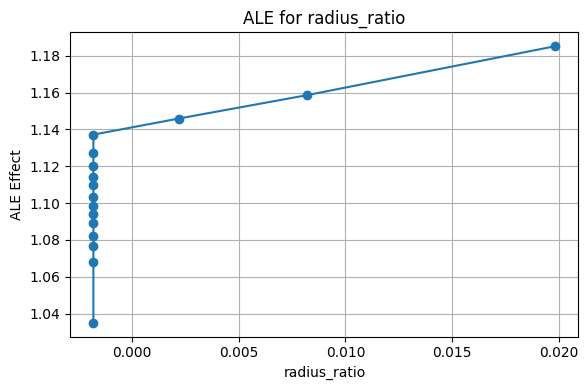

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


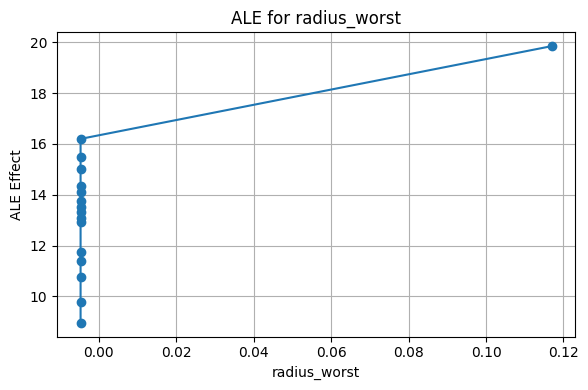

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


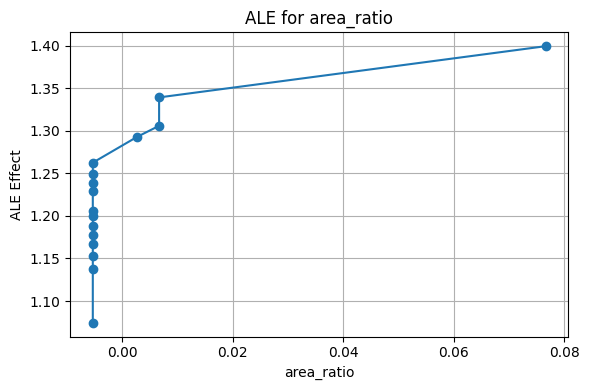

In [ ]:
for feature in top5_features:
    feature_idx = list(X.columns).index(feature)

    ale_explainer = ALE(predict_fn, feature_names=list(X.columns), target_names=["Benign", "Malignant"])
    explanation = ale_explainer.explain(X_test.to_numpy(), features=[feature_idx])

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(explanation.ale_values[0], explanation.feature_values[0], marker='o')
    ax.set_xlabel(feature)
    ax.set_ylabel("ALE Effect")
    ax.set_title(f"ALE for {feature}")
    ax.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
ale_explainer = ALE(predictor=rf_model.predict_proba, feature_names=X.columns.tolist())

ale_exp = ale_explainer.explain(X_test.to_numpy())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local

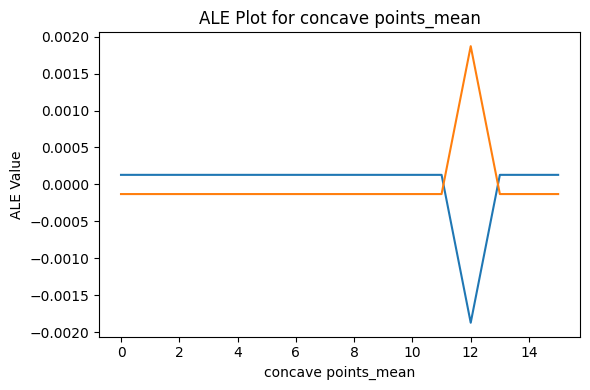

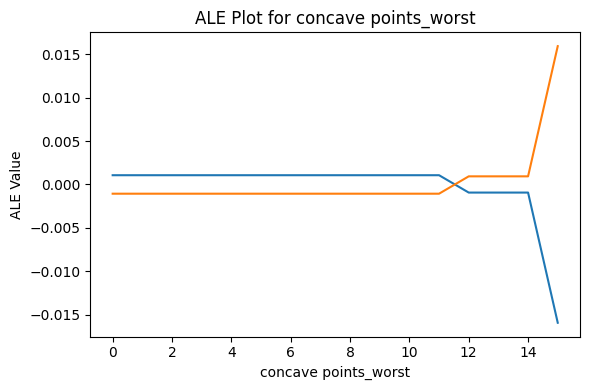

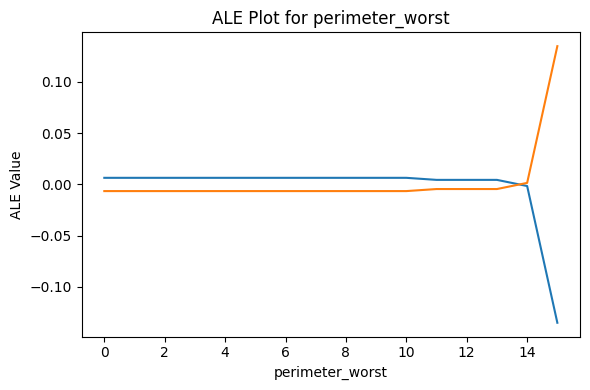

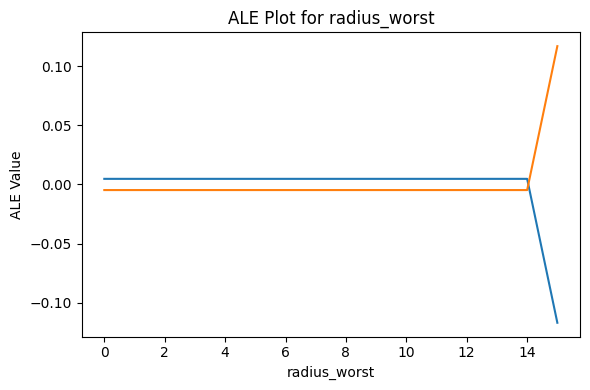

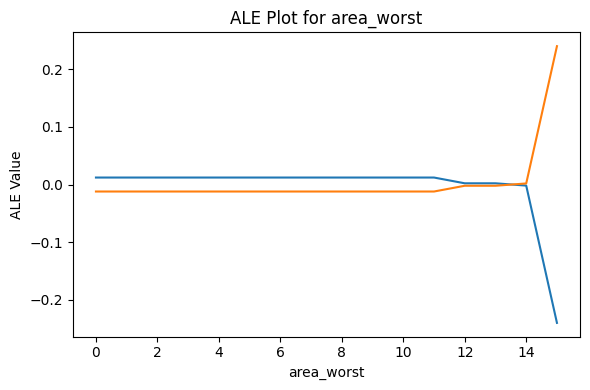

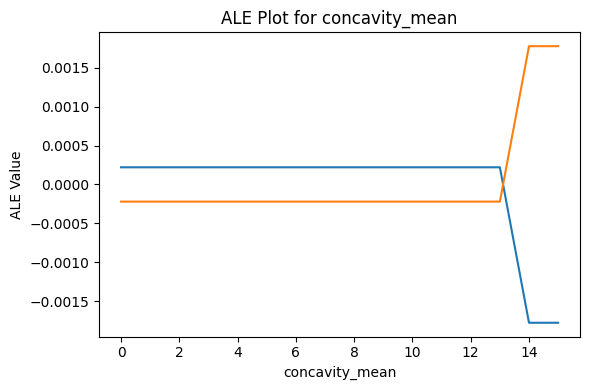

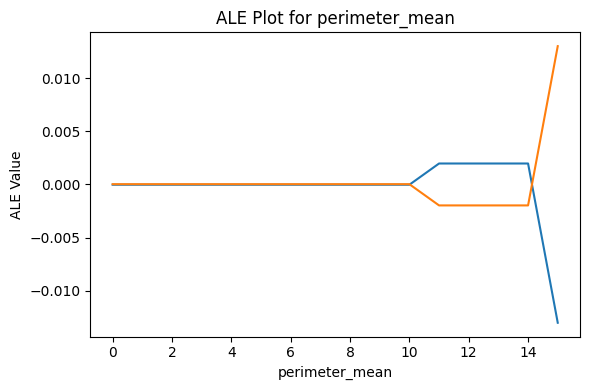

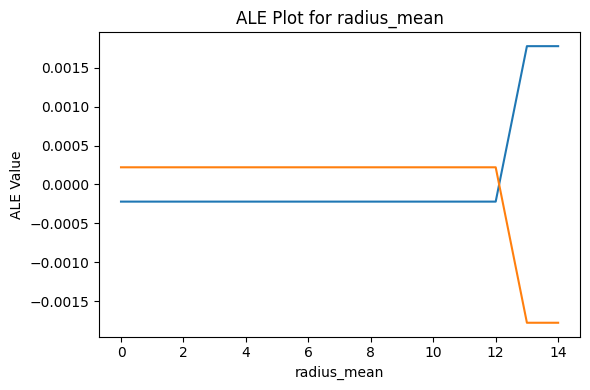

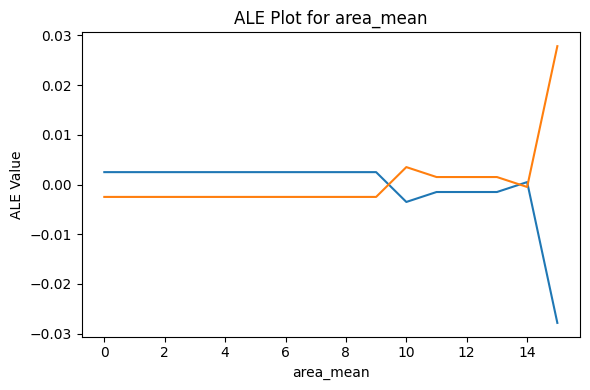

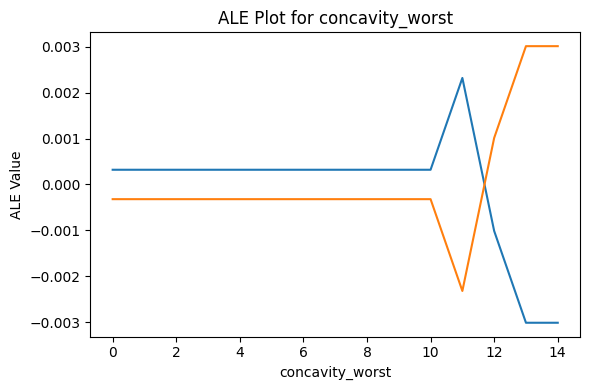

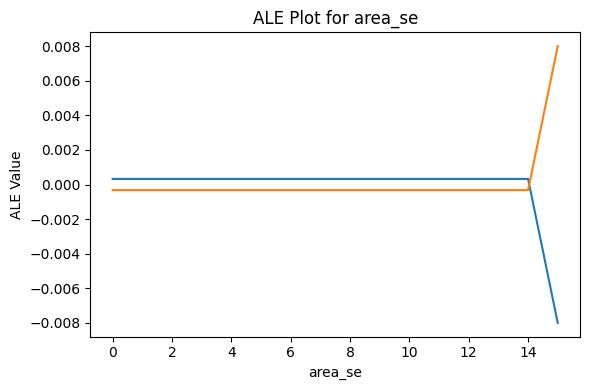

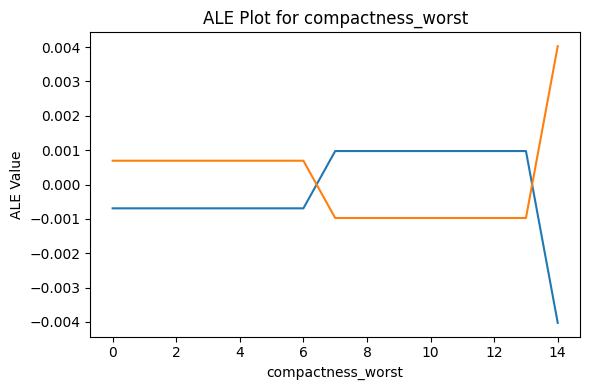

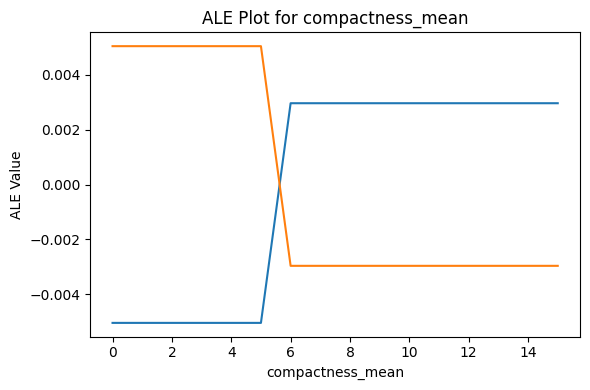

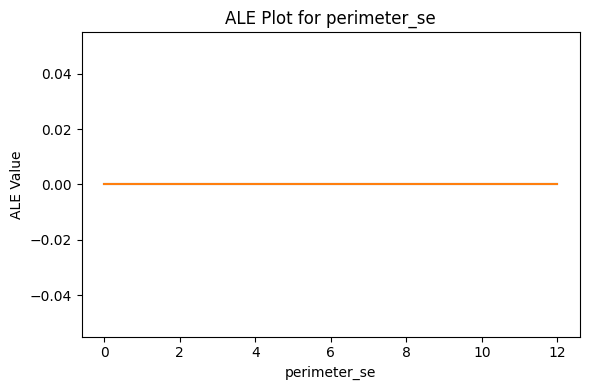

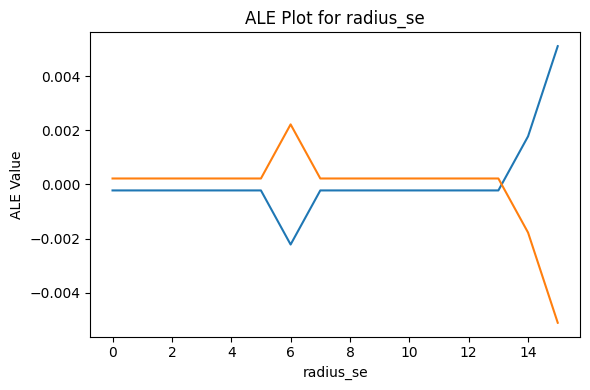

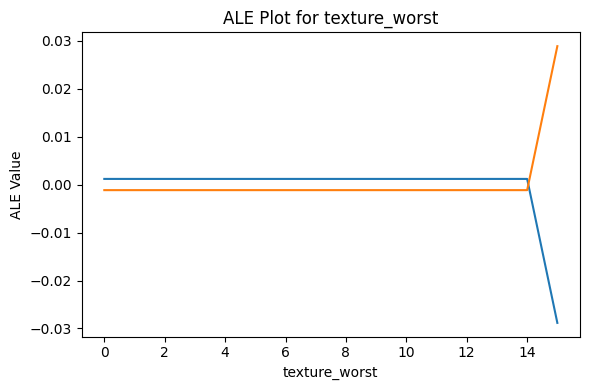

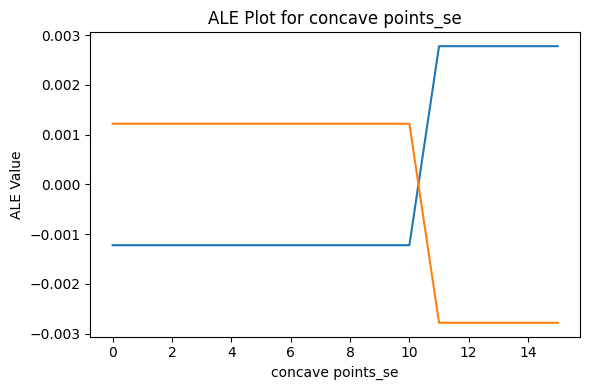

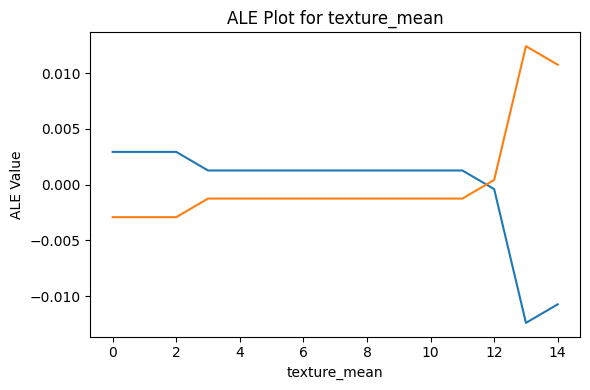

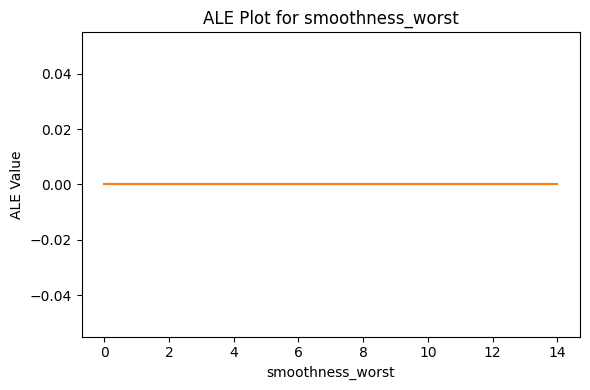

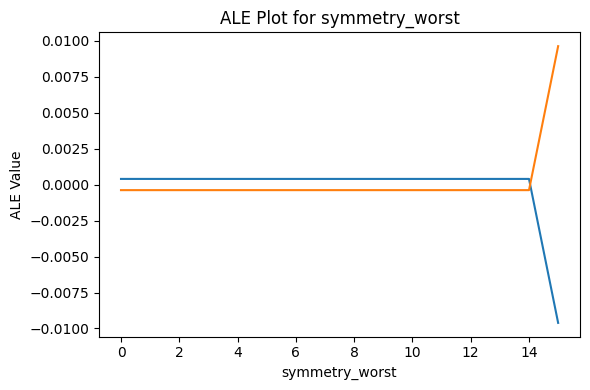

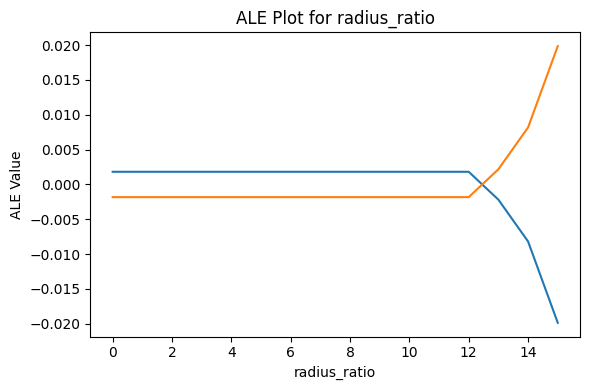

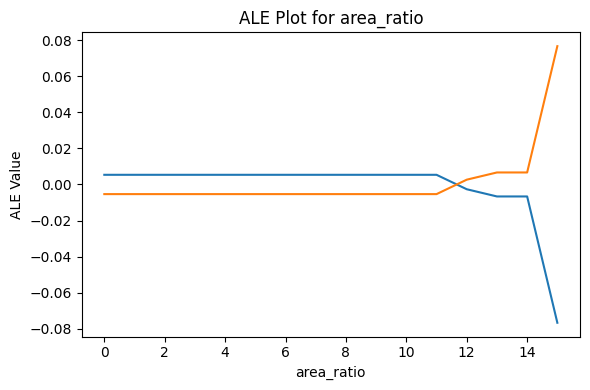

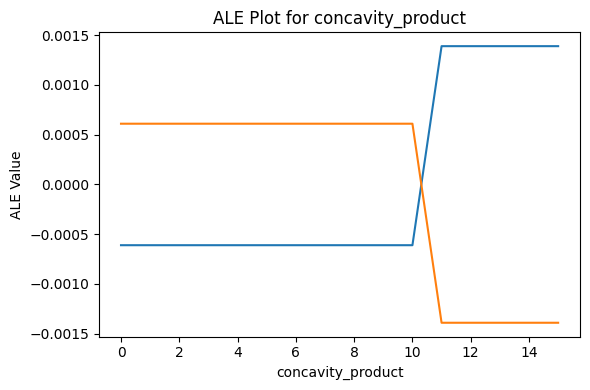

In [ ]:
for idx, feature in enumerate(X.columns):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(ale_exp.ale_values[idx])
    ax.set_title(f"ALE Plot for {feature}")
    ax.set_xlabel(f"{feature}")
    ax.set_ylabel("ALE Value")
    plt.tight_layout()
    plt.show()

In [ ]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 7.2 MB/s eta 0:00:00


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm_rf = PermutationImportance(rf_model, random_state=42)
perm_rf.fit(X_train, y_train)

eli5.show_weights(perm_rf, feature_names=X.columns.tolist())


Weight,Feature
0.0043 ± 0.0000,radius_ratio
0.0043 ± 0.0000,texture_mean
0.0043 ± 0.0000,texture_worst
0.0035 ± 0.0035,area_ratio
0 ± 0.0000,perimeter_se
0 ± 0.0000,perimeter_worst
0 ± 0.0000,radius_worst
0 ± 0.0000,area_worst
0 ± 0.0000,concavity_mean
0 ± 0.0000,perimeter_mean


# **LOFO (Leave-One-Feature-Out Importance)**

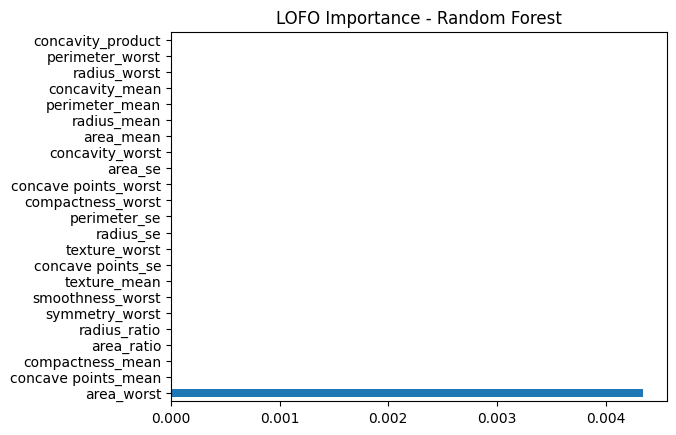

In [ ]:
from sklearn.model_selection import cross_val_score

baseline = cross_val_score(rf_model, X_train, y_train, cv=5).mean()

lofo_scores = {}
for col in X.columns:
    X_lofo = X_train.drop(columns=[col])
    score = cross_val_score(rf_model, X_lofo, y_train, cv=5).mean()
    lofo_scores[col] = baseline - score

lofo_df = pd.Series(lofo_scores).sort_values(ascending=False)
lofo_df.plot(kind='barh')
plt.title("LOFO Importance - Random Forest")
plt.show()

# **ICE**

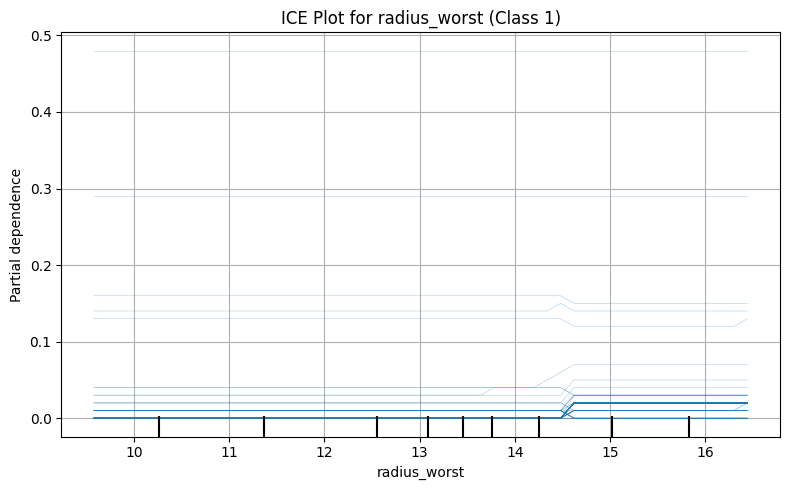

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt


important_feature = top5_features[3]
feature_idx = list(X.columns).index(important_feature)


fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(
    rf_model,
    X_test,
    features=[feature_idx],
    feature_names=X.columns.tolist(),
    target=1,
    kind='individual',
    grid_resolution=50,
    ax=ax
)
plt.title(f"ICE Plot for {important_feature} (Class 1)")
plt.grid(True)
plt.tight_layout()
plt.show()